<a href="https://colab.research.google.com/github/samanvitha2407/Employee-Salary-Prediction-using-ML/blob/main/EmployeeSalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
sal_data1=pd.read_csv("/content/Updated_Employee_Salaries_20k.csv")
sal_data1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,110000.0
1,28.0,Female,Master's,Data Analyst,3.0,85000.0
2,45.0,Male,PhD,Senior Manager,15.0,170000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,80000.0
4,52.0,Male,Master's,Director,20.0,220000.0


In [199]:
sal_data1.shape

(375, 6)

In [200]:
sal_data1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [201]:


sal_data1.columns = ['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary' ]

In [202]:
sal_data1.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_Title,object
Experience_years,float64
Salary,float64


In [203]:
sal_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [204]:
sal_data1[sal_data1.duplicated()].shape

(50, 6)

In [205]:

sal_data1 = sal_data1.drop_duplicates(keep = 'first')
sal_data1.shape

(325, 6)

In [206]:
sal_data1.isnull().sum()

,0
Age,1
Gender,1
Degree,1
Job_Title,1
Experience_years,1
Salary,1


In [207]:
sal_data1.dropna(inplace = True)
sal_data1.isnull().sum()


,0
Age,0
Gender,0
Degree,0
Job_Title,0
Experience_years,0
Salary,0


In [208]:
sal_data1.shape

(324, 6)

In [209]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,110000.0
1,28.0,Female,Master's,Data Analyst,3.0,85000.0
2,45.0,Male,PhD,Senior Manager,15.0,170000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,80000.0
4,52.0,Male,Master's,Director,20.0,220000.0


In [210]:
sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,119985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,20350.000000
25%,31.000000,4.000000,75000.000000
50%,36.500000,9.000000,115000.000000
75%,44.000000,16.000000,160000.000000
max,53.000000,25.000000,270000.000000


In [211]:


corr = sal_data1[['Age', 'Experience_years', 'Salary' ]].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

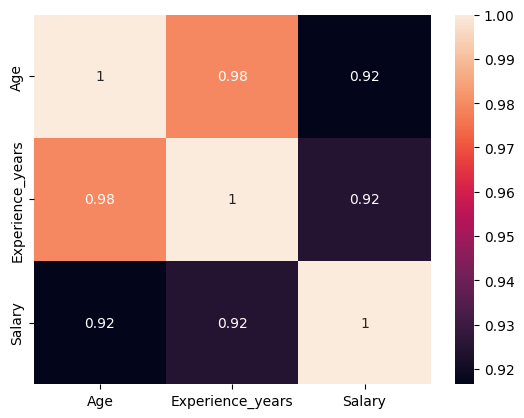

In [212]:
sns.heatmap(corr,annot=True)

In [213]:
sal_data1['Degree' ].value_counts()

,count
Degree,
Bachelor's,191
Master's,91
PhD,42


<Axes: xlabel='Degree'>

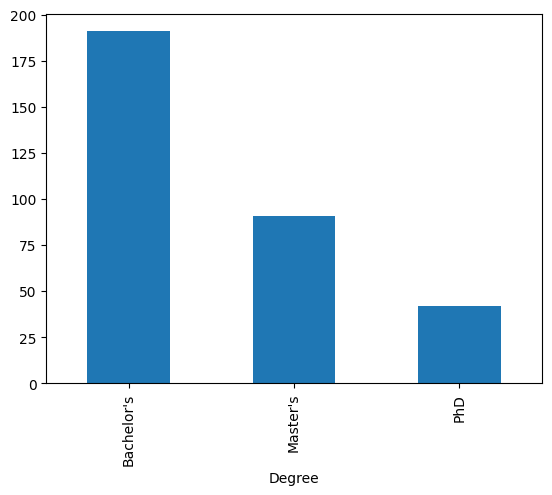

In [214]:
sal_data1['Degree' ].value_counts().plot(kind = 'bar')

In [215]:
sal_data1['Job_Title' ].value_counts()

,count
Job_Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Data Scientist,6
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


<Axes: ylabel='Gender'>

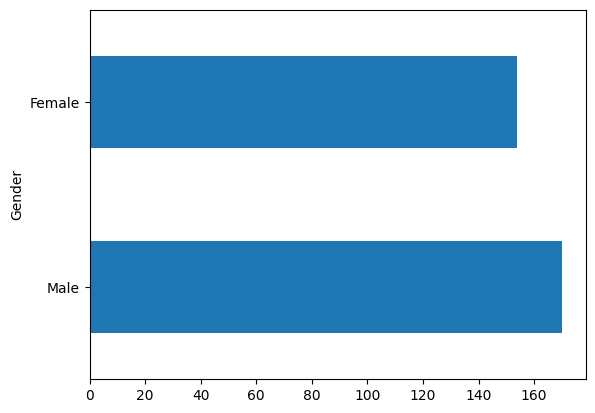

In [216]:
sal_data1['Gender' ].value_counts().plot(kind = 'barh')

<Axes: ylabel='Frequency'>

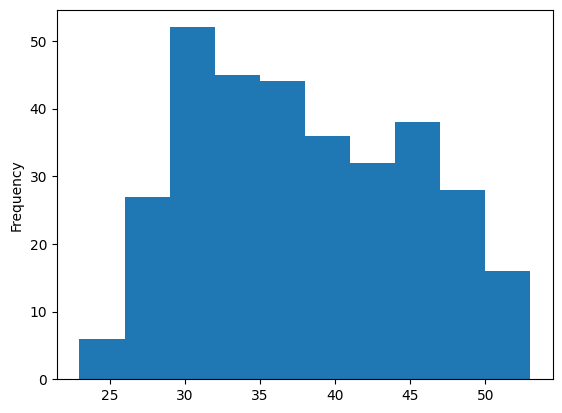

In [217]:
sal_data1.Age.plot(kind = 'hist')

<Axes: >

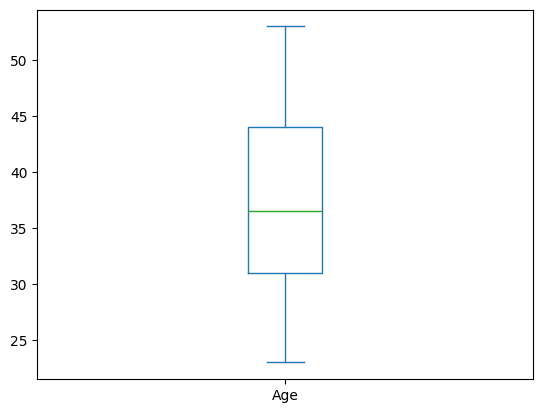

In [218]:
sal_data1.Age.plot(kind = 'box')

<Axes: >

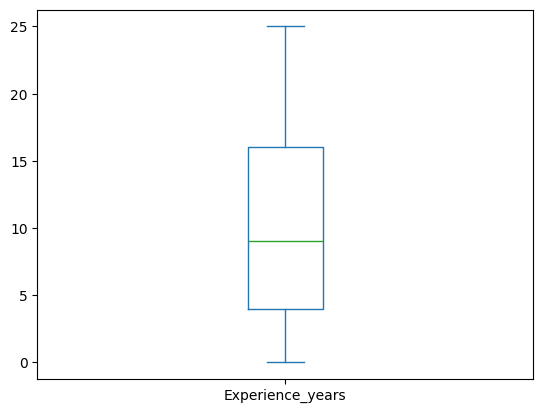

In [219]:
sal_data1.Experience_years.plot(kind = 'box')

<Axes: >

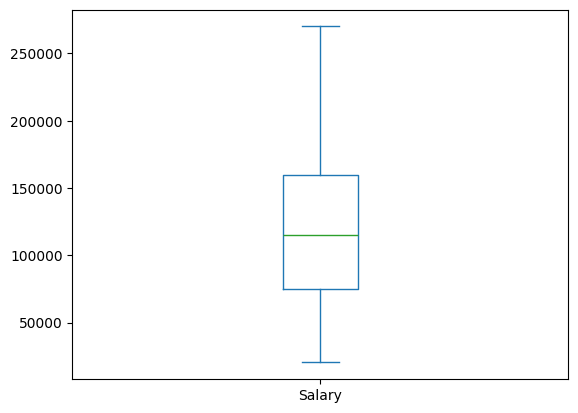

In [220]:
sal_data1.Salary.plot(kind = 'box')

<Axes: ylabel='Frequency'>

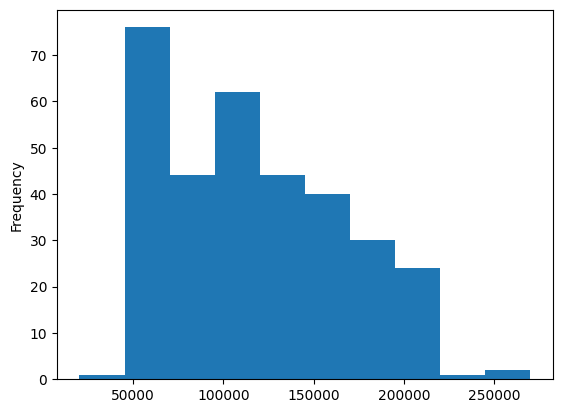

In [221]:
sal_data1.Salary.plot(kind = 'hist')

In [222]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [223]:
sal_data1['Gender_Encode' ] = Label_Encoder.fit_transform(sal_data1['Gender' ])

In [224]:
sal_data1['Degree_Encode' ] = Label_Encoder.fit_transform(sal_data1['Degree' ])

In [225]:
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

In [226]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,110000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,85000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,170000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,80000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,220000.0,1,1,22


In [227]:
from sklearn. preprocessing import StandardScaler
std_scaler = StandardScaler()

In [228]:
sal_data1['Age_scaled'] =std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled' ] = std_scaler.fit_transform(sal_data1[['Experience_years']])



In [229]:

sal_data1.head()


,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,110000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,85000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,170000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,80000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,220000.0,1,1,22,2.037324,1.497148


In [230]:
x=sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Experience_years_scaled','Job_Title_Encode']]
y=sal_data1['Salary']

In [231]:
x.head()

,Age_scaled,Gender_Encode,Degree_Encode,Experience_years_scaled,Job_Title_Encode
0,-0.750231,1,0,-0.761821,159
1,-1.307742,0,1,-1.063017,17
2,1.061680,1,2,0.744158,130
3,-0.192720,0,0,-0.460625,101
4,2.037324,1,1,1.497148,22


In [232]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

x_train. head()

,Age_scaled,Gender_Encode,Degree_Encode,Experience_years_scaled,Job_Title_Encode
73,-1.307742,1,0,-1.213615,166
182,0.922302,0,2,0.744158,155
17,0.225413,1,2,0.292364,116
24,0.504169,1,1,0.442962,37
146,0.643547,0,2,0.894756,115


In [233]:
x_train.shape

(259, 5)

In [234]:
x_test.shape

(65, 5)

In [235]:
from sklearn.linear_model import LinearRegression

Linear_regeression_model = LinearRegression()

In [236]:
Linear_regeression_model.fit(x_train, y_train)

LinearRegression()

In [237]:
y_pred_lr = Linear_regeression_model.predict(x_test)
y_pred_lr

array([137415.91344602, 145562.80742758,  68965.15386167, 148739.34887988,
       126828.49930535, 119654.76748821,  69101.27883652,  77130.71108104,
       186333.69009266,  63112.61060113,  60544.18249367, 142553.217185  ,
       127631.15450848, 175580.48335296, 103652.23602446, 190890.28450907,
       118984.50106226, 129338.33008328,  62267.86835535,  68089.87647812,
        95674.93528581,  84499.29874156,  83619.2494321 ,  51543.41552147,
       208376.92844437, 110340.76921722, 175285.91529198, 180863.57809872,
       205183.73163709,  54741.26224478, 144850.6230462 , 185106.94121635,
       107085.00622186, 175425.69514031, 169190.25441885,  65729.74800187,
       108475.39474629, 112025.62668073, 117997.32557607,  60411.112659  ,
       109995.79796521,  73873.21977084, 128677.48549927,  74590.96778663,
        56497.92729223,  68611.85493217, 149193.72126941,  63102.58902589,
       182383.16672117, 101874.95829259, 177771.0301154 ,  63984.89040816,
        79950.21740617, 1

In [238]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': y_pred_lr })
df ['Error'] = df['y_Actual'] - df['y_Predicted' ]
df ['abs_error' ] = abs(df['Error' ])
df

,y_Actual,y_Predicted,Error,abs_error
132,120000.0,137415.913446,-17415.913446,17415.913446
108,120000.0,145562.807428,-25562.807428,25562.807428
137,70000.0,68965.153862,1034.846138,1034.846138
9,130000.0,148739.348880,-18739.348880,18739.348880
181,125000.0,126828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,100000.0,137279.788471,-37279.788471,37279.788471
233,105000.0,103396.821876,1603.178124,1603.178124
60,190000.0,197743.761029,-7743.761029,7743.761029
94,95000.0,92275.144274,2724.855726,2724.855726


In [239]:


Mean_absolute_Error = df['abs_error' ].mean()
Mean_absolute_Error

np.float64(10570.786401136182)

In [240]:


df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': y_pred_lr })
df ['Error'] = df['y_Actual'] - df['y_Predicted' ]
df ['abs_error' ] = abs(df['Error'])
Mean_absolute_Error = df['abs_error' ].mean()
Mean_absolute_Error

np.float64(10570.786401136182)

In [241]:

from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [242]:
r2_score(y_test, y_pred_lr)

print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100} %')


Accuracy of the model = 89.11 %


In [243]:
round(mean_absolute_error(y_test, y_pred_lr),2)

10570.79

In [244]:


print(f"Mean Absolute Error = {round(mean_absolute_error(y_test, y_pred_lr),2)}")

Mean Absolute Error = 10570.79


In [245]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse

205754135.72

In [246]:


print(f"Mean Sqaured Error = {round(mean_squared_error(y_test, y_pred_lr),2)}")

Mean Sqaured Error = 205754135.72


In [247]:
print('ROOT MEAN SQUARED ERROR [RMSE]= ',mse**(0.5) )

ROOT MEAN SQUARED ERROR [RMSE]=  14344.132449193294


In [248]:
Linear_regeression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.92043082e+04,
       1.95769562e+01])

In [249]:
Linear_regeression_model.intercept_

np.float64(106001.49320553183)

In [250]:
import joblib
joblib.dump(Linear_regeression_model,'Salary_Prediction_Model.pkl')

['Salary_Prediction_Model.pkl']

In [251]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Load the trained model and scalers/encoders
model = joblib.load("Salary_Prediction_Model.pkl")

# Load the original data used for training to fit the encoders and scalers
# This is crucial for ensuring the scalers and encoders are fitted on the same data distribution
# as the training data. Replace 'your_original_dataset.csv' with the actual path
# to your original dataset file.
try:
    original_data = pd.read_csv("/content/Dataset09-Employee-salary-prediction.csv")
    # Rename columns to match the notebook
    original_data.columns = ['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary']
    # Handle missing values and duplicates as done in the notebook
    original_data = original_data.drop_duplicates(keep = 'first')
    original_data.dropna(inplace = True)
except FileNotFoundError:
    st.error("Error: Original dataset file not found. Please make sure 'Dataset09-Employee-salary-prediction.csv' is in the correct path.")
    st.stop() # Stop the app if the dataset is not found


# Define and fit scalers and encoders on the original data
std_scaler = StandardScaler()
label_encoder_gender = LabelEncoder()
label_encoder_degree = LabelEncoder()
label_encoder_job = LabelEncoder()

std_scaler.fit(original_data[['Age', 'Experience_years']])
label_encoder_gender.fit(original_data['Gender'])
label_encoder_degree.fit(original_data['Degree'])
label_encoder_job.fit(original_data['Job_Title'])

st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Prediction App")
st.markdown("Predict employee salary based on input features.")

# Sidebar inputs
st.sidebar.header("Input Employee Details")

Age = st.sidebar.slider("Age", int(original_data['Age'].min()), int(original_data['Age'].max()), 30)
Gender = st.sidebar.selectbox("Gender", original_data['Gender'].unique())
Degree = st.sidebar.selectbox("Degree", original_data['Degree'].unique())
Job_Title = st.sidebar.selectbox("Job_Title", original_data['Job_Title'].unique())
Experience_years = st.sidebar.slider("Years of Experience", int(original_data['Experience_years'].min()), int(original_data['Experience_years'].max()), 5)

# Build input DataFrame
input_df = pd.DataFrame({
    'Age': [Age],
    'Gender': [Gender],
    'Degree': [Degree],
    'Job_Title': [Job_Title],
    'Experience_years': [Experience_years]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Preprocess input data to match training data
input_df['Gender_Encode'] = label_encoder_gender.transform(input_df['Gender'])
input_df['Degree_Encode'] = label_encoder_degree.transform(input_df['Degree'])
input_df['Job_Title_Encode'] = label_encoder_job.transform(input_df['Job_Title'])

# Scale numerical features
input_df[['Age_scaled', 'Experience_years_scaled']] = std_scaler.transform(input_df[['Age', 'Experience_years']])

# Select features for prediction (must match training features)
input_features = input_df[['Age_scaled', 'Gender_Encode', 'Degree_Encode', 'Experience_years_scaled', 'Job_Title_Encode']]


# Predict button
if st.button("Predict Salary"):
    prediction = model.predict(input_features)
    st.success(f"✅ Predicted Salary is : ₹{prediction[0]:,.2f} per month")

Overwriting app.py


In [252]:
!pip install pyngrok streamlit --quiet


In [253]:
!ngrok authtoken 30GiyPtWcRCfVNPCgv6o60hqfYv_3YCKcwN1KteR66zfN3zih

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [254]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py & -- server.port 8501')

threading.Thread(target=run_streamlit).start()

In [255]:
from pyngrok import ngrok
import time

time.sleep(5)

# ✅ Fix is here: bind_tls=True
public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)

Streamlit app is live at: NgrokTunnel: "https://3405b3a018d5.ngrok-free.app" -> "http://localhost:8501"
